In [4]:
import numpy as np
import pandas as pd
import os
df = pd.read_csv("C:/Users/murar/OneDrive/Desktop/ml_data/Advertising.csv")

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
transactions = []
for i in range(0, df.shape[0]):
    transactions.append([str(item) for item in df.iloc[i] if str(item) != 'nan'])
print(transactions[:5])

[['1.0', '230.1', '37.8', '69.2', '22.1'], ['2.0', '44.5', '39.3', '45.1', '10.4'], ['3.0', '17.2', '45.9', '69.3', '9.3'], ['4.0', '151.5', '41.3', '58.5', '18.5'], ['5.0', '180.8', '10.8', '58.4', '12.9']]


In [10]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 4.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

     support      itemsets
0       0.01         (0.3)
1       0.01         (1.0)
2       0.01         (1.5)
3       0.01         (1.6)
4       0.01        (10.0)
..       ...           ...
200     0.01   (33.0, 1.5)
201     0.01   (8.4, 11.6)
202     0.01  (73.4, 12.9)
203     0.01  (17.2, 45.9)
204     0.01  (19.6, 45.1)

[205 rows x 2 columns]


In [14]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0      (33.0)       (1.5)               0.015               0.010     0.01   
1       (1.5)      (33.0)               0.010               0.015     0.01   
2       (8.4)      (11.6)               0.025               0.030     0.01   
3      (11.6)       (8.4)               0.030               0.025     0.01   
4      (73.4)      (12.9)               0.010               0.025     0.01   
5      (12.9)      (73.4)               0.025               0.010     0.01   
6      (17.2)      (45.9)               0.020               0.010     0.01   
7      (45.9)      (17.2)               0.010               0.020     0.01   
8      (19.6)      (45.1)               0.025               0.015     0.01   
9      (45.1)      (19.6)               0.015               0.025     0.01   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.666667  66.666667  0.009850    2.970000       1.000000  
1    1.000000

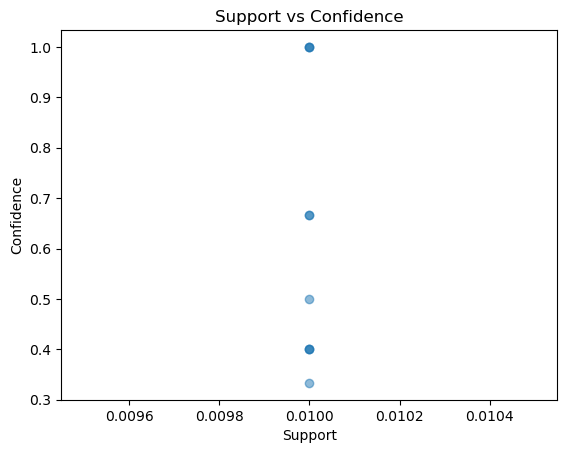

In [16]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [18]:
rules_high_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules_high_confidence)

  antecedents consequents  antecedent support  consequent support  support  \
0      (33.0)       (1.5)               0.015               0.010     0.01   
1       (1.5)      (33.0)               0.010               0.015     0.01   
2      (73.4)      (12.9)               0.010               0.025     0.01   
3      (17.2)      (45.9)               0.020               0.010     0.01   
4      (45.9)      (17.2)               0.010               0.020     0.01   
5      (45.1)      (19.6)               0.015               0.025     0.01   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.666667  66.666667  0.009850       2.970       1.000000  
1    1.000000  66.666667  0.009850         inf       0.994949  
2    1.000000  40.000000  0.009750         inf       0.984848  
3    0.500000  50.000000  0.009800       1.980       1.000000  
4    1.000000  50.000000  0.009800         inf       0.989899  
5    0.666667  26.666667  0.009625       2.925       0.977157  
